In [1]:
import pandas as pd
import numpy as np

This module we'll be looking at the New York City tree census. This data was provided by a volunteer driven census in 2015, and we'll be accessing it via the socrata API. The main site for the data is [here](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), and on the upper right hand side you'll be able to see the link to the API.

The data is conveniently available in json format, so we should be able to just read it directly in to Pandas:

In [2]:
url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json'
trees = pd.read_json(url)


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
5,190422,106099,2015-08-30,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1014500,New York,40.770046,-73.984950,9.884187e+05,219825.5227,3.0,145.0,1076229.0,1.011310e+09
6,190426,106099,2015-08-30,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1014500,New York,40.770210,-73.985338,9.883112e+05,219885.2785,3.0,145.0,1076229.0,1.011310e+09
7,208649,103940,2015-09-07,9,0,OnCurb,Alive,Good,Tilia americana,American linden,...,1012700,New York,40.762724,-73.987297,9.877691e+05,217157.8561,3.0,133.0,1086093.0,1.010410e+09
8,209610,407443,2015-09-08,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,5006400,New York,40.596579,-74.076255,9.630732e+05,156635.5542,NaN,NaN,NaN,NaN
9,192755,207508,2015-08-31,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,3037402,New York,40.586357,-73.969744,9.926537e+05,152903.6306,47.0,37402.0,3320727.0,3.072350e+09


Looks good, but lets take a look at the shape of this data:

In [6]:
trees.shape

(1000, 45)

1000 seems like too few trees for a city like New York, and a suspiciously round number. What's going on?

Socrata places a 1000 row limit on their API. Raw data is meant to be "paged" through for applications, with the expectation that a UX wouldn't be able to handle a full dataset. 

As a simple example, if we had a mobile app with limited space that only displayed trees 5 at a time, we could view the first 5 trees in the dataset with the url below:

In [4]:
firstfive_url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=5&$offset=0'
firstfive_trees = pd.read_json(firstfive_url)
firstfive_trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29,739,4052307,4022210001
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19,973,4101931,4044750045
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34,449,3338310,3028870001
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34,449,3338342,3029250001
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39,165,3025654,3010850052


If we wanted the next 5, we would use this url:

In [5]:
nextfive_url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=5&$offset=5'
nextfive_trees = pd.read_json(nextfive_url)
nextfive_trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,190422,106099,2015-08-30,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1014500,New York,40.770046,-73.984950,988418.6997,219825.5227,3.0,145.0,1076229.0,1.011310e+09
1,190426,106099,2015-08-30,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1014500,New York,40.770210,-73.985338,988311.1900,219885.2785,3.0,145.0,1076229.0,1.011310e+09
2,208649,103940,2015-09-07,9,0,OnCurb,Alive,Good,Tilia americana,American linden,...,1012700,New York,40.762724,-73.987297,987769.1163,217157.8561,3.0,133.0,1086093.0,1.010410e+09
3,209610,407443,2015-09-08,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,5006400,New York,40.596579,-74.076255,963073.1998,156635.5542,NaN,NaN,NaN,NaN
4,192755,207508,2015-08-31,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,3037402,New York,40.586357,-73.969744,992653.7253,152903.6306,47.0,37402.0,3320727.0,3.072350e+09


You can read more about paging using the Socrata API [here](https://dev.socrata.com/docs/paging.html)

In these docs, you'll also see more advanced functions (called `SoQL`) under the "filtering and query" section. These functions should be reminding you of SQL.

Think about the shape you want your data to be in before querying it. Using `SoQL` is a good way to avoid the limits of the API. For example, using the below query I can easily obtain the count of each species of tree in the Bronx:

In [6]:
boro = 'Bronx'
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=spc_common,count(tree_id)' +\
        '&$where=boroname=\'Bronx\'' +\
        '&$group=spc_common').replace(' ', '%20')
soql_trees = pd.read_json(soql_url)

soql_trees

,count_tree_id,spc_common
0,4619,NaN
1,662,silver maple
2,18,pagoda dogwood
3,3917,littleleaf linden
4,12,American larch
...,...,...
128,362,sugar maple
129,170,Cornelian cherry
130,203,white oak
131,88,Kentucky yellowwood


This behavior is very common with web APIs, and I think this is useful when thinking about building interactive data products. When in a Jupyter Notebook or RStudio, there's an expectation that (unless you're dealing with truly large datasets) the data you want can be brought in memory and manipulated.

Dash and Shiny abstract away the need to distinguish between client side and server side to make web development more accessible to data scientists. This can lead to some unintentional design mistakes if you don't think about how costly your callback functions are (for example: nothing will stop you in dash from running a costly model triggered whenever a dropdown is called.)

The goal of using the Socrata is to force you to think about where your data operations are happening, and not resort to pulling in the data and performing all operations in local memory.

----------

**NOTE**: One tip in dealing with URLs: you may need to replace spaces with `'%20'`. I personally just write out the url and then follow the string with a replace:

In [10]:
'https://api-url.com/?query with spaces'.replace(' ', '%20')

'https://api-url.com/?query%20with%20spaces'

In [69]:
def format(itemlist):
    #i/p List  ["Bronx", "Queens" ]
    #o/p String : ("Bronx", "Queens")
    tmpList = ['\"' + str(elm) + '\"' for elm in itemlist]
    return '(' + ', ' .join(tmpList) + ')'


In [72]:
boroughs = ['Bronx', 'Queens']
species = ['sugar maple', 'silver maple']

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health , spc_common ,boroname ,count(tree_id)' +\
        '&$where=boroname in ' + format(boroughs) + ' and spc_common in ' + format(species) + ' ' +\
        '&$group=health,spc_common,boroname').replace(' ', '%20')
print(soql_url)
soql_trees = pd.read_json(soql_url)

soql_trees



https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$select=health%20,%20spc_common%20,boroname%20,count(tree_id)&$where=boroname%20in%20("Bronx",%20"Queens")%20and%20spc_common%20in%20("sugar%20maple",%20"silver%20maple")%20&$group=health,spc_common,boroname


,health,spc_common,boroname,count_tree_id
0,Fair,silver maple,Bronx,102
1,Poor,silver maple,Queens,261
2,Good,sugar maple,Queens,874
3,Fair,sugar maple,Queens,286
4,Good,silver maple,Bronx,522
5,Poor,sugar maple,Bronx,30
6,Good,silver maple,Queens,4695
7,Poor,sugar maple,Queens,122
8,Fair,sugar maple,Bronx,69
9,Poor,silver maple,Bronx,38


In [73]:
soql_trees['boroname_and_species'] = soql_trees['boroname'] + ',' + soql_trees['spc_common']
print(soql_trees)



   health    spc_common boroname  count_tree_id boroname_and_species
0    Fair  silver maple    Bronx            102   Bronx,silver maple
1    Poor  silver maple   Queens            261  Queens,silver maple
2    Good   sugar maple   Queens            874   Queens,sugar maple
3    Fair   sugar maple   Queens            286   Queens,sugar maple
4    Good  silver maple    Bronx            522   Bronx,silver maple
5    Poor   sugar maple    Bronx             30    Bronx,sugar maple
6    Good  silver maple   Queens           4695  Queens,silver maple
7    Poor   sugar maple   Queens            122   Queens,sugar maple
8    Fair   sugar maple    Bronx             69    Bronx,sugar maple
9    Poor  silver maple    Bronx             38   Bronx,silver maple
10   Good   sugar maple    Bronx            263    Bronx,sugar maple
11   Fair  silver maple   Queens           1160  Queens,silver maple


In [74]:
soql_trees = soql_trees.drop(columns=['spc_common', 'boroname'])




In [75]:
print(soql_trees)


   health  count_tree_id boroname_and_species
0    Fair            102   Bronx,silver maple
1    Poor            261  Queens,silver maple
2    Good            874   Queens,sugar maple
3    Fair            286   Queens,sugar maple
4    Good            522   Bronx,silver maple
5    Poor             30    Bronx,sugar maple
6    Good           4695  Queens,silver maple
7    Poor            122   Queens,sugar maple
8    Fair             69    Bronx,sugar maple
9    Poor             38   Bronx,silver maple
10   Good            263    Bronx,sugar maple
11   Fair           1160  Queens,silver maple


In [83]:
soql_trees['health_ratio'] = soql_trees.groupby(['boroname_and_species'])['count_tree_id'].transform(lambda x: x/x.sum()*100)


In [76]:
print(soql_trees)

   health  count_tree_id boroname_and_species
0    Fair            102   Bronx,silver maple
1    Poor            261  Queens,silver maple
2    Good            874   Queens,sugar maple
3    Fair            286   Queens,sugar maple
4    Good            522   Bronx,silver maple
5    Poor             30    Bronx,sugar maple
6    Good           4695  Queens,silver maple
7    Poor            122   Queens,sugar maple
8    Fair             69    Bronx,sugar maple
9    Poor             38   Bronx,silver maple
10   Good            263    Bronx,sugar maple
11   Fair           1160  Queens,silver maple


In [84]:
soql_treesgroupBy = soql_trees.sort_values(['boroname_and_species'], ascending=[True])
print(soql_treesgroupBy)

   health  count_tree_id boroname_and_species  health_ratio
0    Fair            102   Bronx,silver maple     15.407855
4    Good            522   Bronx,silver maple     78.851964
9    Poor             38   Bronx,silver maple      5.740181
5    Poor             30    Bronx,sugar maple      8.287293
8    Fair             69    Bronx,sugar maple     19.060773
10   Good            263    Bronx,sugar maple     72.651934
1    Poor            261  Queens,silver maple      4.267495
6    Good           4695  Queens,silver maple     76.765860
11   Fair           1160  Queens,silver maple     18.966645
2    Good            874   Queens,sugar maple     68.174727
3    Fair            286   Queens,sugar maple     22.308892
7    Poor            122   Queens,sugar maple      9.516381


In [90]:
boro = 'Bronx'

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=distinct(boroname)')
boroughs = pd.read_json(soql_url)





,boroname_1
0,Brooklyn
1,Manhattan
2,Queens
3,Bronx
4,Staten Island


In [95]:
boroughs[0:2]['boroname_1']

0     Brooklyn
1    Manhattan
Name: boroname_1, dtype: object

In [87]:

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=distinct(spc_common)')
spc_common = pd.read_json(soql_url)

spc_common

,spc_common_1
0,NaN
1,silver maple
2,pagoda dogwood
3,littleleaf linden
4,American larch
...,...
128,sugar maple
129,Cornelian cherry
130,white oak
131,Kentucky yellowwood


In [92]:

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=distinct(steward)')
steward = pd.read_json(soql_url)

steward

,steward_1
0,3or4
1,NaN
2,4orMore
3,1or2
4,None


In [91]:
if ((len(boroughs)>0) & (len(species) < 0)):
    print("s")
else:
    print("w")
 

w


In [94]:
trees['steward']
trees.dr

0      None
1      None
2      1or2
3      None
4      None
       ... 
995    1or2
996    None
997    None
998    None
999    None
Name: steward, Length: 1000, dtype: object

In [257]:
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=*' +\
        '&$where=steward is not null and health  is not null &$limit=80000').replace(' ', '%20')
trees = pd.read_json(soql_url)

trees.shape[0]

80000

In [254]:
curFetch = 0
offset = 0
while curFetch > 0:
  offset = offset + 1000 
  url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=*' +\
        '&$where=steward is not null and health  is not null &$limit=1000&$offset={}'.format(offset)
  soql_url = (url).replace(' ', '%20')
  curdf = pd.read_json(soql_url)
  curFetch = curdf.shape[0]
  trees.append(curdf)



  




In [258]:
#trees = trees[(trees['steward'] != "None") & (trees['health'] != "None")]
trees['BiVariateCatg'] = trees['steward'].astype(str) + '|' +  trees['health'].astype(str)

trees['BiVariateCatg'] = pd.Categorical(trees['BiVariateCatg'])


trees.head()



,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl,BiVariateCatg
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,None|Fair
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09,None|Fair
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09,1or2|Good
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09,None|Good
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09,None|Good


In [228]:
trees['BiVariateCatg'].unique()


(80000, 46)

In [259]:
trees.shape

(80000, 46)

In [251]:
import datashader as ds
import datashader.transfer_functions as tf
import datashader.glyphs
from datashader import reductions
from datashader.core import bypixel
from datashader.utils import lnglat_to_meters as webm, export_image
from datashader.colors import colormap_select, Greys9, viridis, inferno
from functools import partial
#Defining some helper functions for DataShader
background = "black"
export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))



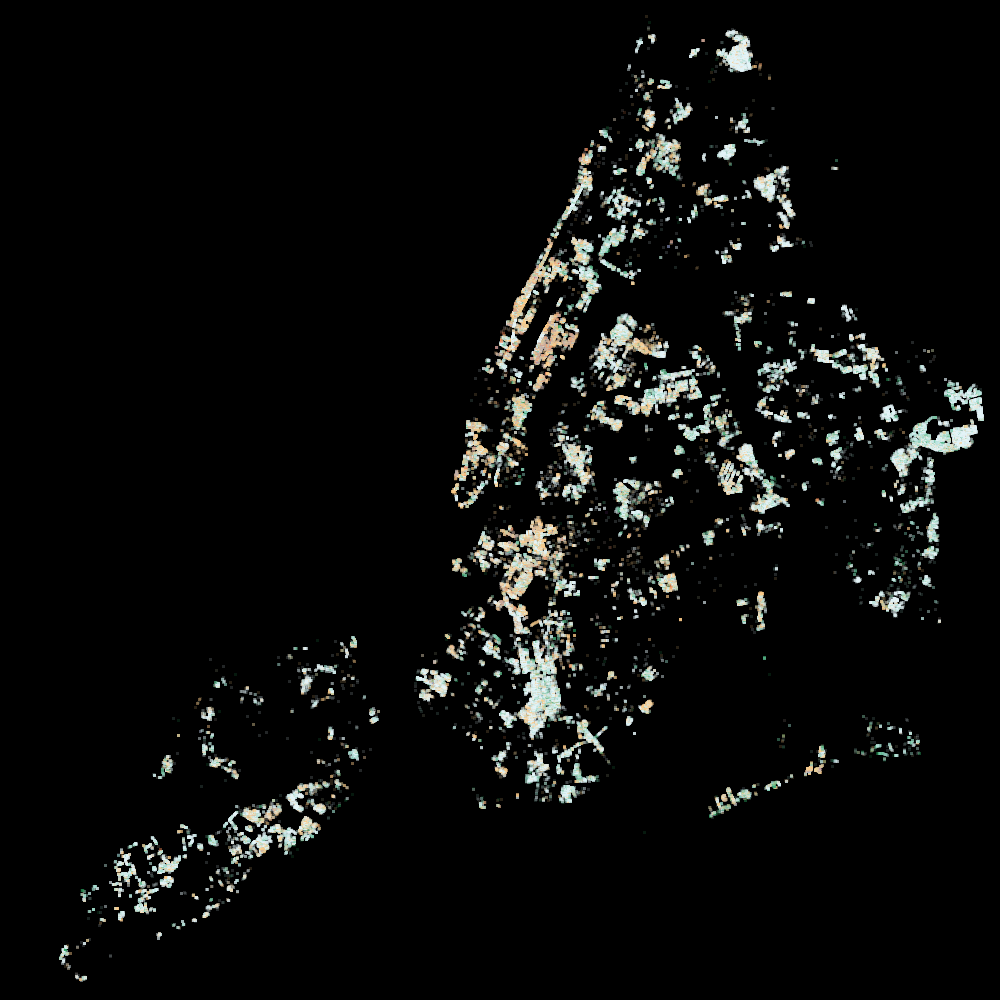

In [260]:

colorscale_seq = {'None|Poor' : "#543005", 'None|Good' : "#8c510a", 'None|Fair' : "#bf812d",
              '1or2|Poor' : "#dfc27d", '1or2|Good' : "#f6e8c3", '1or2|Fair' : "#f5f5f5", 
              '3or4|Poor' :"#c7eae5",'3or4|Good' : "#c7eae5", '3or4|Fair': "#80cdc1", 
              '4orMore|Poor' : "#35978f",'4orMore|Good' : "#01665e", '4orMore|Fair' : "#003c30"
             }

colorscale_df = {'None|Poor' : "#2ca25f", 'None|Good' : "#e5f5f9", 'None|Fair' : "#99d8c9",
              '1or2|Poor' : "#b3cde3", '1or2|Good' : "#fdcc8a", '1or2|Fair' : "#CBD2AA", 
              '3or4|Poor' :"#8c96c6",'3or4|Good' : "#C5B1A8", '3or4|Fair': "#fc8d59", 
              '4orMore|Poor' : "#88419d",'4orMore|Good' : "#FDCC8A", '4orMore|Fair' : "#d7301f"
             }




#['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
NewYorkCity   = (( -74.29,  -73.69), (40.49, 40.92))
cvs = ds.Canvas(1000, 1000, *NewYorkCity)
ds.count_cat('BiVariateCatg')
agg = cvs.points(trees, 'longitude', 'latitude', ds.count_cat('BiVariateCatg'))
view = tf.shade(agg, color_key = colorscale_df)
export(tf.spread(view, px=1), 'choropleth')


In [246]:
from bokeh.plotting import figure, output_file, show
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend

show(create_categorical_legend(colorscale))
